# 05 Model Evaluation

- Model Evaluation
- Over-fitting, Under-fitting and Model Selection
- Ridge Regression
- Grid Search
- Model Refinement

# Evaluation

>How can you be certain the model works in the real world and performs optimally.

## Dataset

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

## Save dataset into data directory

In [2]:
df.to_csv('../data/module_5_auto.csv')

## Use numeric data

In [3]:
df = df._get_numeric_data()
df.head()

Unnamed: 0  Unnamed: 0.1  symboling  normalized-losses  wheel-base  \
0           0             0          3                122        88.6   
1           1             1          3                122        88.6   
2           2             2          1                122        94.5   
3           3             3          2                164        99.8   
4           4             4          2                164        99.4   

     length     width  height  curb-weight  engine-size  ...  stroke  \
0  0.811148  0.890278    48.8         2548          130  ...    2.68   
1  0.811148  0.890278    48.8         2548          130  ...    2.68   
2  0.822681  0.909722    52.4         2823          152  ...    3.47   
3  0.848630  0.919444    54.3         2337          109  ...    3.40   
4  0.848630  0.922222    54.3         2824          136  ...    3.40   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price  \
0                9.0       111.0    5000.0        21           27  13495.0   
1                9.0       111.0    5000.0        21           27  16500.0   
2                9.0       154.0    5000.0        19           26  16500.0   
3               10.0       102.0    5500.0        24           30  13950.0   
4                8.0       115.0    5500.0        18           22  17450.0   

   city-L/100km  diesel  gas  
0     11.190476       0    1  
1     11.190476       0    1  
2     12.368421       0    1  
3      9.791667       0    1  
4     13.055556       0    1  

[5 rows x 21 columns]

## Import plotting libraries

In [4]:
from IPython.display import display
from ipywidgets import widgets, interact, interactive, fixed, interact_manual

## Functions for plotting

In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [6]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Training and Testing

>Ssplit your data into training and testing data. 

In [7]:
# place the target data price in a separate dataframe y
y_data = df['price']
y_data.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [8]:
# drop price data in x data
x_data=df.drop('price',axis=1)
x_data.head()

Unnamed: 0  Unnamed: 0.1  symboling  normalized-losses  wheel-base  \
0           0             0          3                122        88.6   
1           1             1          3                122        88.6   
2           2             2          1                122        94.5   
3           3             3          2                164        99.8   
4           4             4          2                164        99.4   

     length     width  height  curb-weight  engine-size  bore  stroke  \
0  0.811148  0.890278    48.8         2548          130  3.47    2.68   
1  0.811148  0.890278    48.8         2548          130  3.47    2.68   
2  0.822681  0.909722    52.4         2823          152  2.68    3.47   
3  0.848630  0.919444    54.3         2337          109  3.19    3.40   
4  0.848630  0.922222    54.3         2824          136  3.19    3.40   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0                9.0       111.0    5000.0        21           27   
1                9.0       111.0    5000.0        21           27   
2                9.0       154.0    5000.0        19           26   
3               10.0       102.0    5500.0        24           30   
4                8.0       115.0    5500.0        18           22   

   city-L/100km  diesel  gas  
0     11.190476       0    1  
1     11.190476       0    1  
2     12.368421       0    1  
3      9.791667       0    1  
4     13.055556       0    1

In [9]:
# split our data into training and testing data
# using the function train_test_split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

>Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train_1" , "x_test_1", "y_train_1" and "y_test_1"

In [10]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)

In [11]:
print(f"number of test samples : { x_test_1.shape[0]}")
print(f"number of training samples: {x_train_1.shape[0]}")

number of test samples : 81
number of training samples: 120


In [12]:
# Import LinearRegression from the module linear_model
from sklearn.linear_model import LinearRegression

In [13]:
# Create a Linear Regression object:
lre=LinearRegression()

In [14]:
# Fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

>See the R^2 is much smaller using the test data.

In [16]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

### Find the R^2 on the test data using 90% of the data for training data

In [17]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_data, y_data, test_size=0.10, random_state=0)

In [18]:
print(f"number of test samples : { x_test_2.shape[0]}")
print(f"number of training samples: {x_train_2.shape[0]}")

number of test samples : 21
number of training samples: 180


In [19]:
from sklearn.linear_model import LinearRegression
lre_2 = LinearRegression()
lre_2.fit(x_train_2[['horsepower']], y_train_2)
print(f"R^2 on the test data = {lre_2.score(x_test_2[['horsepower']], y_test_2)}")

R^2 on the test data = 0.7340722810055448


## Cross-validation Score

In [20]:
# import model_selection from the module cross_val_score.
from sklearn.model_selection import cross_val_score

In [21]:
# input the object, the feature in this case ' horsepower', 
# the target data (y_data). 
# The parameter 'cv' determines the number of folds; in this case 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [22]:
#The default scoring is R^2; 
# each element in the array has the average R^2 value in the fold:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [23]:
# Calculate the average and standard deviation of our estimate
print(f"Mean of the folds are {Rcross.mean()}")
print(f"Standard deviation is {Rcross.std()}")

Mean of the folds are 0.522009915042119
Standard deviation is 0.291183944475603


In [24]:
# use negative squared error as a score 
# by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

### Calculate the average R^2 using two folds

>Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature

In [25]:
Rcross2 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print(f"R^2 using two folds : {Rcross2}")
print(f"Average R^2 using two folds = {Rcross2.mean()}")
print(f"R^2 for the second fold = {Rcross2[1]}")

R^2 using two folds : [0.59015621 0.44319613]
Average R^2 using two folds = 0.5166761697127429
R^2 for the second fold = 0.443196127755029


### Predict using cross_val_predict

In [26]:
# use the function 'cross_val_predict' to predict the output. 
# splits up the data into the specified number of folds, 
# using one fold to get a prediction while the rest of the folds are used as test data

from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, Underfitting and Model Selection

In [27]:
# Create Multiple linear regression objects and train the model 
# using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [29]:
#Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

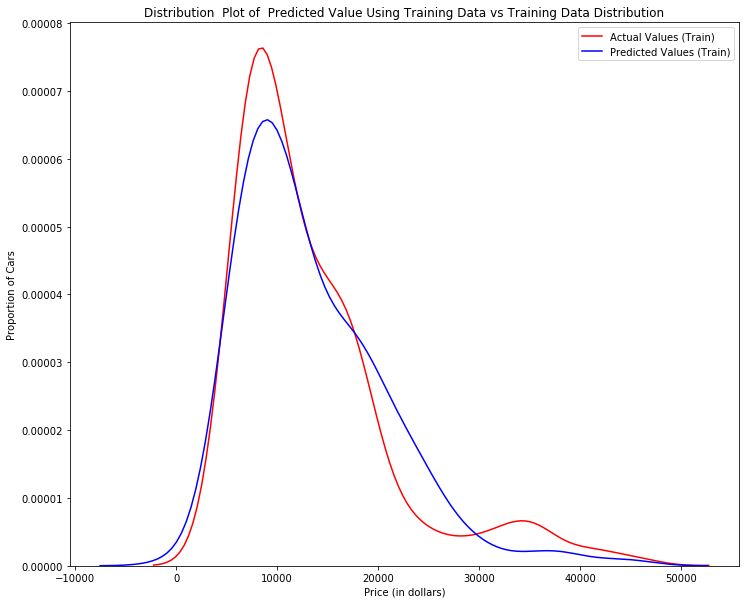

In [30]:
# Perform some model evaluation using our training and testing data separately. First we import the seaborn and matplotlibb library for plotting.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Examine the distribution of the predicted values of the training data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

> Figure 1: Plot of predicted values using the training data compared to the training data.

>Model seems to be doing well in learning from the training dataset. 

>When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

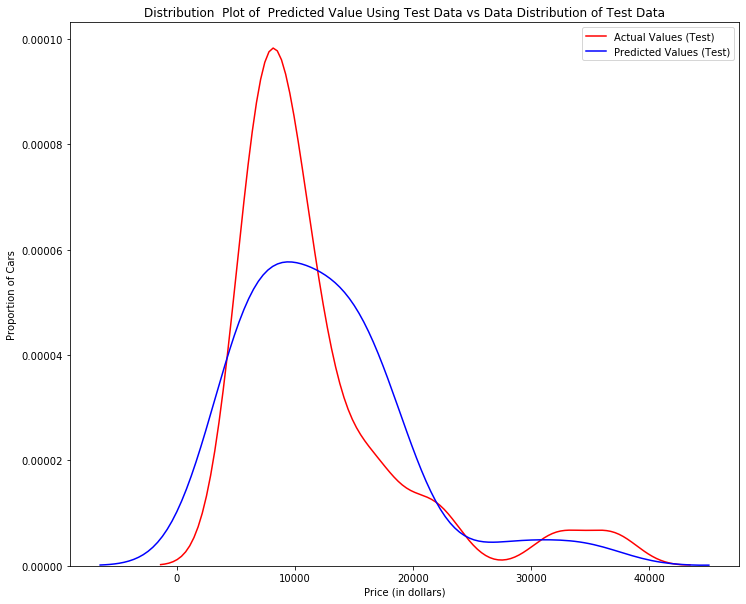

In [31]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

>Figur 2: Plot of predicted value using the test data compared to the test data.

>Comparing Figure 1 and Figure 2
>The distribution of the test data in Figure 1 is much better at fitting the data. 

>This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. 

>This is where the distribution shape is exceptionally different. 

In [32]:
# see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.
from sklearn.preprocessing import PolynomialFeatures

### Overfitting

>Overfitting occurs when the model fits the noise, not the underlying process. 

> when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. 

### Create a degree 5 polynomial model

In [33]:
# use 55 percent of the data for testing and the rest for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [34]:
# Perform a degree 5 polynomial transformation on the feature 'horse power'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

### Create a linear regression model "poly" and train it.

In [35]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# See the output of our model using the method "predict." then 
# assign the values to "yhat".

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [37]:
# Take the first five predicted values and 
# compare it to the actual targets.

print(f"Predicted values: {yhat[0:4]}")
print(f"True values: {y_test[0:4].values}")

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


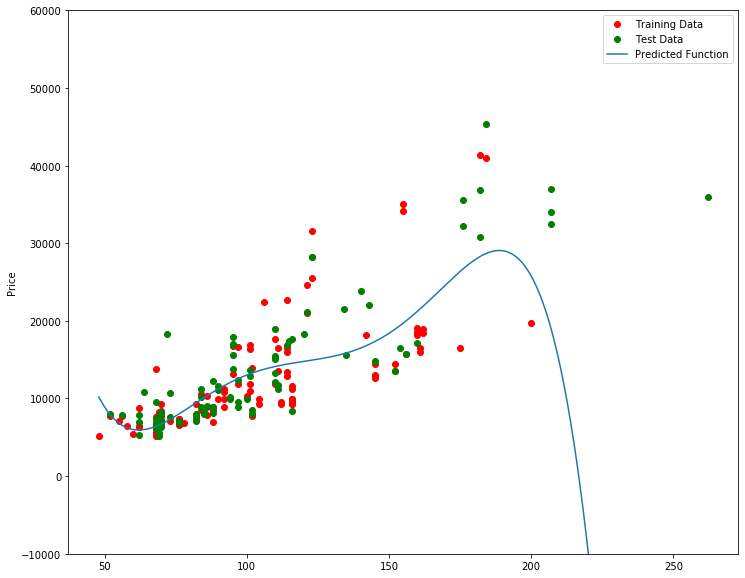

In [38]:
# Use PollyPlot to display the training data, testing data, and the predicted function.

PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

>Figure 4: A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

>The estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [39]:
# R^2 of the training data

poly.score(x_train_pr, y_train)

0.556771690212023

In [40]:
#R^2 of the test data

poly.score(x_test_pr, y_test)

-29.871340302044153

>R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

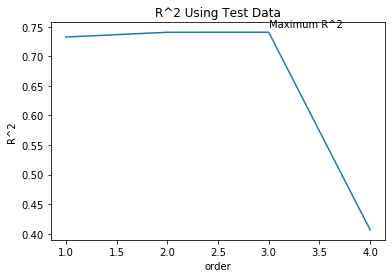

In [41]:
# How the R^2 changes on the test data for different order polynomials and plot the results

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ');    

> R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.

### Experiment with different polynomial orders

In [42]:
# The function f is used to experiment with different polynomial orders
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [43]:
# Experiment with different polynomial orders and different amounts of data.
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05));

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

### Create a "PolynomialFeatures" object "pr1" of degree two

In [44]:
pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

### Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.

In [45]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])

In [46]:
x_train_pr1.shape[1]

15

### Create a linear regression model "poly1" and train the object 

In [47]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Use the method "predict" to predict an output on the polynomial features

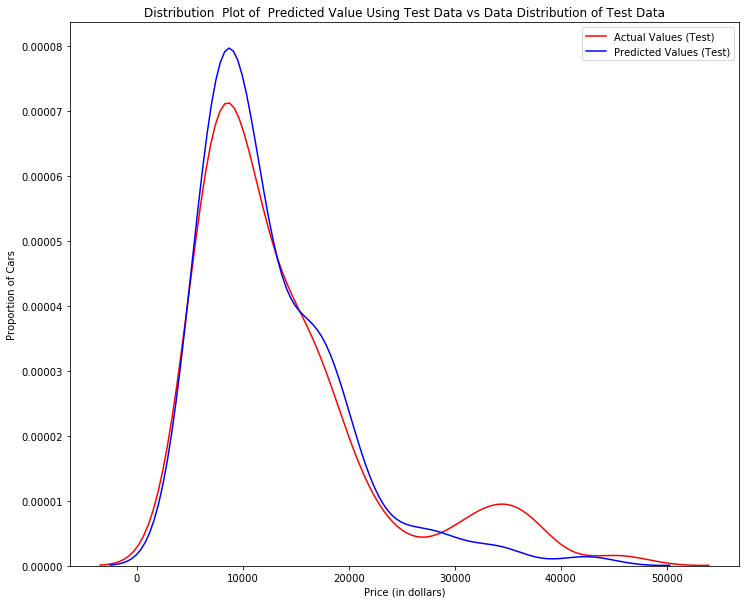

In [48]:
yhat_test1=poly1.predict(x_train_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

### Use the distribution plot to determine the two regions were the predicted prices are less accurate than the actual prices.

>The predicted value is lower than actual value for cars where the price around 10,000

> the predicted price is larger than the price cost from 30,000 to 40,000 

# Ridge regression

> how the parameter Alfa changes the model. Just a note here our test data will be used as validation data.

In [49]:
# Perform a degree two polynomial transformation on our data.
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [50]:
# Import Ridge from the module linear models.
from sklearn.linear_model import Ridge

In [51]:
# Create a Ridge regression object, setting the regularization parameter to 0.1
RigeModel=Ridge(alpha=0.1)

In [52]:
# Fit the model using the method fit.
RigeModel.fit(x_train_pr, y_train)

/home/ayman/anaconda3/envs/dapy/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
# Obtain a prediction:
yhat = RigeModel.predict(x_test_pr)

In [54]:
# Compare the first five predicted samples to the test set
print(f'predicted: {yhat[0:4]}')
print(f'test set : { y_test[0:4].values}')

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [55]:
# Select the value of Alfa that minimizes the test error, for example, we can use a for loop.
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

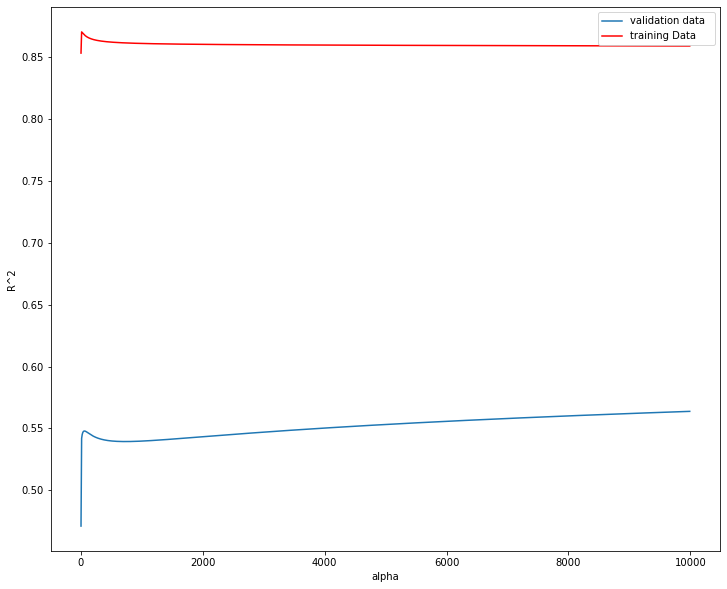

In [56]:
# Plot out the value of R^2 for different Alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend();

>Figure 6:The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa

>The red line in figure 6 represents the R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data. The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.

### Perform Ridge regression 
>Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. 
- The parameter alpha should be set to 10.

In [57]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

# Grid Search

>The term Alfa is a hyperparameter
sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [58]:
# import GridSearchCV from the module model_selection.
from sklearn.model_selection import GridSearchCV

In [59]:
# Create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [60]:
# Create a ridge regions object:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
# Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [62]:
# Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

/home/ayman/anaconda3/envs/dapy/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
# The object finds the best parameter values on the validation data.
# Obtain the estimator with the best parameters and 
# assign it to the variable BestRR 

BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
# Test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

### Perform a grid search 
>Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters

In [65]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

/home/ayman/anaconda3/envs/dapy/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)